# Comparação entre os Métodos de Gauss-Jacobi e Gauss-Seidel
Este notebook compara a convergência dos métodos para um sistema com convergência garantida.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Sistema linear com matriz diagonal dominante
A = np.array([[8.0, -2.0, 1.0],
              [1.0, 10.0, -2.0],
              [-1.0, 2.0, 9.0]])
b = np.array([13.0, 14.0, -6.0])

In [3]:
# Implementações dos métodos

In [4]:
def gauss_jacobi(A, b, x0=None, tol=1e-10, max_iter=100):
    n = len(b)
    if x0 is None:
        x0 = np.zeros(n)
    x = x0.copy()
    history = [x0.copy()]
    for _ in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        history.append(x_new.copy())
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    return x, history


In [5]:
def gauss_seidel(A, b, x0=None, tol=1e-10, max_iter=100):
    n = len(b)
    if x0 is None:
        x0 = np.zeros(n)
    x = x0.copy()
    history = [x0.copy()]
    for _ in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i+1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        history.append(x_new.copy())
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    return x, history


In [6]:
# Solução exata
x_exact = np.linalg.solve(A, b)
print(x_exact)

[ 1.97686375  1.0655527  -0.68380463]


In [7]:
# Executando os métodos
x_jacobi, hist_jacobi = gauss_jacobi(A, b)
x_seidel, hist_seidel = gauss_seidel(A, b)

In [8]:
# DataFrames com os resultados
df_jacobi = pd.DataFrame(hist_jacobi, columns=['x1_Jacobi', 'x2_Jacobi', 'x3_Jacobi'])
df_seidel = pd.DataFrame(hist_seidel, columns=['x1_Seidel', 'x2_Seidel', 'x3_Seidel'])
df_compare = pd.concat([df_jacobi, df_seidel], axis=1)
df_compare

,x1_Jacobi,x2_Jacobi,x3_Jacobi,x1_Seidel,x2_Seidel,x3_Seidel
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.625000,1.400000,-0.666667,1.625000,1.237500,-0.761111
2,2.058333,1.104167,-0.797222,2.029514,1.044826,-0.673349
3,2.000694,1.034722,-0.683333,1.970375,1.068293,-0.685134
4,1.969097,1.063264,-0.674306,1.977715,1.065202,-0.683632
5,1.975104,1.068229,-0.684159,1.976754,1.065598,-0.683827
6,1.977577,1.065658,-0.684595,1.976878,1.065547,-0.683802
7,1.976989,1.065323,-0.683749,1.976862,1.065553,-0.683805
8,1.976799,1.065551,-0.683740,1.976864,1.065553,-0.683805
9,1.976855,1.065572,-0.683811,1.976864,1.065553,-0.683805


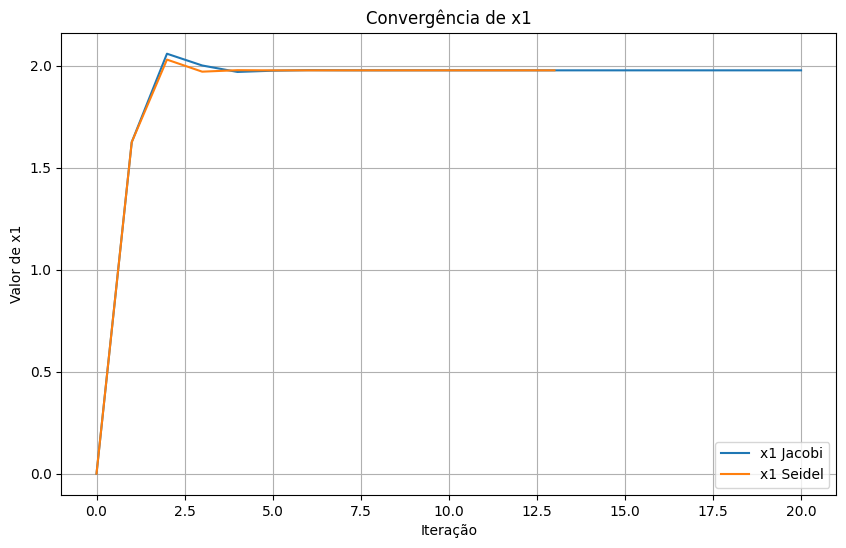

In [9]:
# Gráfico da convergência
plt.figure(figsize=(10, 6))
plt.plot(df_jacobi.index, df_jacobi['x1_Jacobi'], label='x1 Jacobi')
plt.plot(df_seidel.index, df_seidel['x1_Seidel'], label='x1 Seidel')
plt.xlabel('Iteração')
plt.ylabel('Valor de x1')
plt.legend()
plt.title('Convergência de x1')
plt.grid()
plt.show()